In [1]:
# Dependencies
import requests
import json
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress

# OpenWeatherMap API key
from config import api_key

# Import citipy for cities based on lat/long values
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [3]:
#Save config information
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build patrial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
# query_url


In [4]:
# Set lists to hold response info
city_data = []
cloudiness = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# Set initial counts
counter = 0
result_counter = 1

print("Beginning Data Retrieval\n------------------------------")

# Loop through data to create dataframe
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if counter > 49:
            counter = 1
            result_counter += 1
            city_data.append(city)
        else:
            counter += 1
            city_data.append(city)
        print(f"Processing Record {counter} of Set {result_counter} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | aklavik
Processing Record 3 of Set 1 | severo-kurilsk
City not found. Skipping...
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | plettenberg bay
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | taltal
Processing Record 13 of Set 1 | clyde river
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | jamestown
City not found. Skipping...
Processing Record 16 of Set 1 | hambantota
Processing Record 17 of Set 1 | roblin
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | necochea
Processing Record 20 of Set 1 | dalaba
Processing Record 21 of Set 1 | gilgit
Processing Reco

Processing Record 30 of Set 4 | chake chake
City not found. Skipping...
Processing Record 31 of Set 4 | iqaluit
Processing Record 32 of Set 4 | mentougou
Processing Record 33 of Set 4 | beloha
Processing Record 34 of Set 4 | bethel
City not found. Skipping...
Processing Record 35 of Set 4 | sasebo
Processing Record 36 of Set 4 | pakruojis
Processing Record 37 of Set 4 | port lincoln
City not found. Skipping...
Processing Record 38 of Set 4 | torbay
Processing Record 39 of Set 4 | abu samrah
Processing Record 40 of Set 4 | cockburn town
City not found. Skipping...
Processing Record 41 of Set 4 | sri aman
Processing Record 42 of Set 4 | isangel
Processing Record 43 of Set 4 | spassk-dalniy
Processing Record 44 of Set 4 | sungairaya
Processing Record 45 of Set 4 | yar-sale
Processing Record 46 of Set 4 | yushan
Processing Record 47 of Set 4 | marystown
Processing Record 48 of Set 4 | lensk
Processing Record 49 of Set 4 | taoudenni
Processing Record 50 of Set 4 | saint-francois
Processing 

Processing Record 10 of Set 8 | porto empedocle
Processing Record 11 of Set 8 | thinadhoo
Processing Record 12 of Set 8 | kungurtug
Processing Record 13 of Set 8 | buala
Processing Record 14 of Set 8 | bud
Processing Record 15 of Set 8 | vila velha
Processing Record 16 of Set 8 | aksarka
Processing Record 17 of Set 8 | formosa
Processing Record 18 of Set 8 | olafsvik
Processing Record 19 of Set 8 | hamilton
Processing Record 20 of Set 8 | kribi
Processing Record 21 of Set 8 | roma
Processing Record 22 of Set 8 | tyulyachi
Processing Record 23 of Set 8 | ubinskoye
Processing Record 24 of Set 8 | banda aceh
City not found. Skipping...
Processing Record 25 of Set 8 | buerarema
Processing Record 26 of Set 8 | mwinilunga
Processing Record 27 of Set 8 | kadyy
Processing Record 28 of Set 8 | limoux
Processing Record 29 of Set 8 | vanimo
City not found. Skipping...
Processing Record 30 of Set 8 | bogorodsk
Processing Record 31 of Set 8 | hovd
Processing Record 32 of Set 8 | msowero
Processing 

In [5]:
# Create dictionary of lists for DataFrame
weather_info={
    'City':city_data,
    'Lat':lats,
    'Lng':lngs,
    'Max Temp':max_temps,
    'Humidity':humidities,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speeds,
    'Country':countries,
    'Date':dates
}

In [6]:
# Get weather data into DataFrame
weather_df = pd.DataFrame(weather_info)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,65.0000,-15.0000,2.00,75,75,4.63,IS,1612732175
1,aklavik,68.2191,-135.0107,-27.00,69,90,6.17,CA,1612732175
2,severo-kurilsk,50.6789,156.1250,-9.43,88,30,3.92,RU,1612732176
3,punta arenas,8.9897,125.3400,23.42,95,100,0.79,PH,1612732177
4,rikitea,-23.1203,-134.9692,25.36,72,96,5.35,PF,1612732177


In [7]:
# Save .csv of retrieved data
weather_df.to_csv("Output/weather.csv", index=False, header=True)

In [8]:
# Check count on DataFrame (must be at least 500)
weather_df.count()

City          532
Lat           532
Lng           532
Max Temp      532
Humidity      532
Cloudiness    532
Wind Speed    532
Country       532
Date          532
dtype: int64

In [9]:
# Get all info on DataFrame
# Inspect to see if there are any humidities >100%
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,5.320000e+02
mean,22.242193,22.047420,8.966711,71.518797,57.109023,3.842669,1.612732e+09
std,32.770039,87.175403,18.197001,21.229746,39.986713,2.804890,1.043295e+02
min,-54.800000,-175.200000,-43.000000,9.000000,0.000000,0.130000,1.612732e+09
25%,-6.483350,-51.724750,-4.450000,61.000000,19.000000,1.840000,1.612732e+09
50%,26.459050,23.123250,15.980000,77.000000,75.000000,3.090000,1.612732e+09
75%,50.767500,97.836900,24.450000,87.250000,98.250000,5.140000,1.612732e+09
max,78.218600,179.316700,37.080000,100.000000,100.000000,20.060000,1.612732e+09


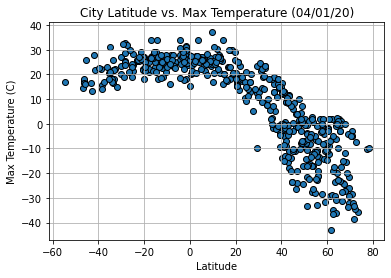

Plot of city latitude vs. max temperature. Temperatures increase closer to the equator and decrease closer to the poles.


In [11]:
# Plot the data using a scatter plot
# Latitude vs. Max Temp
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (04/01/20)')
plt.grid()
plt.savefig("Output/lat_temp.png")
plt.show()

print("Plot of city latitude vs. max temperature. Temperatures increase closer to the equator and decrease closer to the poles.")


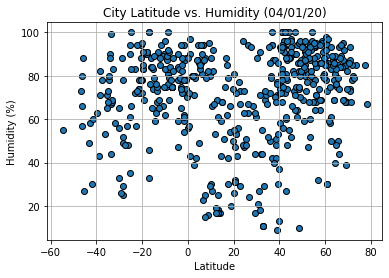

Plot of city latitude vs. humidity. Humidity percentage is highly varied above and below the equator.


In [12]:
# Latitude vs. Humidity
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (04/01/20)')
plt.grid()
plt.savefig("Output/lat_humi.png")
plt.show()

print("Plot of city latitude vs. humidity. Humidity percentage is highly varied above and below the equator.")


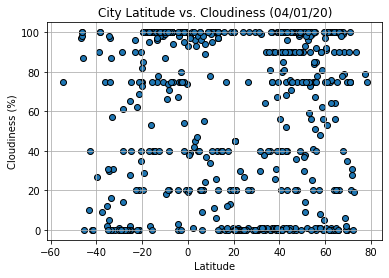

Plot of city latitude vs. cloudiness. Cloudiness percentage is highly varied above and below the equator.


In [13]:
# Latitude vs. Cloudiness
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (04/01/20)')
plt.grid()
plt.savefig("Output/lat_cloud.png")
plt.show()

print("Plot of city latitude vs. cloudiness. Cloudiness percentage is highly varied above and below the equator.")


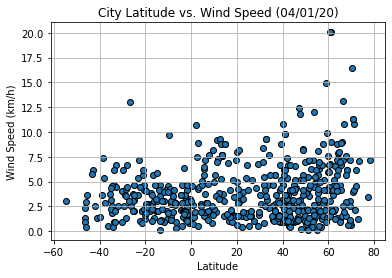

Plot of city latitude vs. wind speed. Wind speed is fairly consistent above and below the equator, with some outliers in both the northern and southern hemispheres.


In [14]:
# Latitude vs. Humidity
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
plt.title('City Latitude vs. Wind Speed (04/01/20)')
plt.grid()
plt.savefig("Output/lat_wind.png")
plt.show()

print("Plot of city latitude vs. wind speed. Wind speed is fairly consistent above and below the equator, with some outliers in both the northern and southern hemispheres.")


In [15]:
northern_hemi=weather_df.loc[weather_df['Lat']>0,:]
northern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,65.0000,-15.0000,2.00,75,75,4.63,IS,1612732175
1,aklavik,68.2191,-135.0107,-27.00,69,90,6.17,CA,1612732175
2,severo-kurilsk,50.6789,156.1250,-9.43,88,30,3.92,RU,1612732176
3,punta arenas,8.9897,125.3400,23.42,95,100,0.79,PH,1612732177
7,plettenberg bay,51.2167,7.8833,-3.89,85,100,0.45,DE,1612732178


The r-squared is: 0.7100915772777825


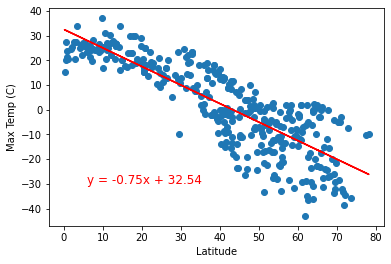

Plot of city latitude vs. max temp (NH). There seems to be a fairly strong relationship between latitude and max temperature in the northern hemisphere. As latitude increases (closer to the poles) temperature decreases. Spread of data points is fairly consistent and linear, which we can see numerically from the r-squared value.


In [16]:
# Linear Regression
# Lat vs. Max Temp (NH)

x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-30),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

print("Plot of city latitude vs. max temp (NH). There seems to be a fairly strong relationship between latitude and max temperature in the northern hemisphere. As latitude increases (closer to the poles) temperature decreases. Spread of data points is fairly consistent and linear, which we can see numerically from the r-squared value.")


In [17]:
southern_hemi=weather_df.loc[weather_df['Lat']<0,:]
southern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,rikitea,-23.1203,-134.9692,25.36,72,96,5.35,PF,1612732177
5,hermanus,-34.4187,19.2345,18.33,78,5,1.88,ZA,1612732177
6,port alfred,-7.0349,29.7638,23.44,75,100,2.84,CD,1612732178
9,ushuaia,-54.8000,-68.3000,17.00,55,75,3.09,AR,1612732133
11,taltal,-25.4000,-70.4833,20.97,61,28,3.73,CL,1612732179


The r-squared is: 0.2171053034209194


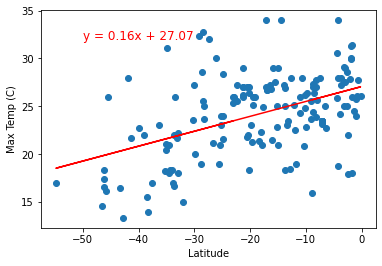

Plot of city latitude vs. max temp (SH). There seems to be less of a relationship between latitude and max temperature in the southern hemisphere. As latitude decreases (closer to the poles) temperature does decrease. However, the spread of data points is less consistent than in NH which is indicative of its r-squared value.


In [19]:
# Linear Regression
# Lat vs. Max Temp (SH)

x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,32),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


print("Plot of city latitude vs. max temp (SH). There seems to be less of a relationship between latitude and max temperature in the southern hemisphere. As latitude decreases (closer to the poles) temperature does decrease. However, the spread of data points is less consistent than in NH which is indicative of its r-squared value.")



The r-squared is: 0.11720201191272583


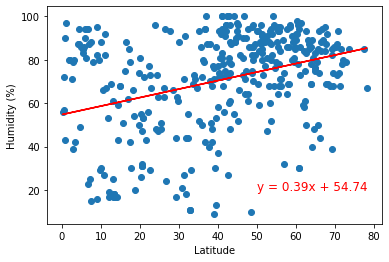

Plot of city latitude vs. humidity (NH). There seems to be little relationship between latitude and humidity in the northern hemisphere. As latitude increases (closer to the poles) the spread of humidity percentages does decrease, but not by much. Data is not well correlated, which is supported by the r-squared value of 0.11720201191272583


In [20]:
# Linear Regression
# Lat vs. Humidity (NH)
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

print(f"Plot of city latitude vs. humidity (NH). There seems to be little relationship between latitude and humidity in the northern hemisphere. As latitude increases (closer to the poles) the spread of humidity percentages does decrease, but not by much. Data is not well correlated, which is supported by the r-squared value of {rvalue**2}")



The r-squared is: 0.12149341977745305


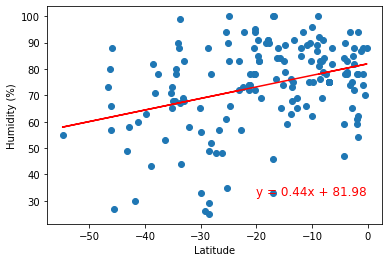

Plot of city latitude vs. humidity (SH). There seems to be little relationship between latitude and humidity in the southern hemisphere. As latitude decreases (closer to the poles) the spread of humidity percentages increases. Data is not well correlated, which is supported by the r-squared value of 0.12149341977745305


In [21]:
# Linear Regression
# Lat vs. Humidity (SH)

x_values = southern_hemi['Lat']
y_values = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,32),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


print(f"Plot of city latitude vs. humidity (SH). There seems to be little relationship between latitude and humidity in the southern hemisphere. As latitude decreases (closer to the poles) the spread of humidity percentages increases. Data is not well correlated, which is supported by the r-squared value of {rvalue**2}")


The r-squared is: 0.010801292402640328


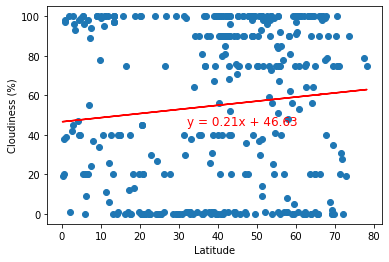

Plot of city latitude vs. cloudiness (NH). There seems to be little relationship between latitude and cloudiness in the northern hemisphere. Data is very randomly distributed (not well correlated), which is supported by the r-squared value of 0.010801292402640328


In [22]:
# Linear Regression
# Lat vs. Cloudiness (NH)
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(32,45),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


print(f"Plot of city latitude vs. cloudiness (NH). There seems to be little relationship between latitude and cloudiness in the northern hemisphere. Data is very randomly distributed (not well correlated), which is supported by the r-squared value of {rvalue**2}")


The r-squared is: 0.1262688802729448


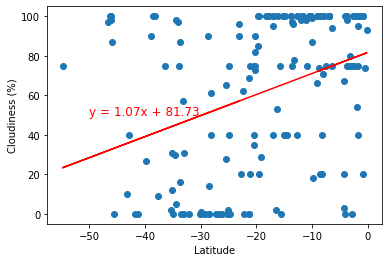

Plot of city latitude vs. cloudiness (SH). Data is very randomly distributed (not well correlated), which is supported by the r-squared value of 0.1262688802729448


In [23]:
# Linear Regression
# Lat vs. Cloudiness (SH)
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

print(f"Plot of city latitude vs. cloudiness (SH). Data is very randomly distributed (not well correlated), which is supported by the r-squared value of {rvalue**2}")





The r-squared is: 0.012110078441175334


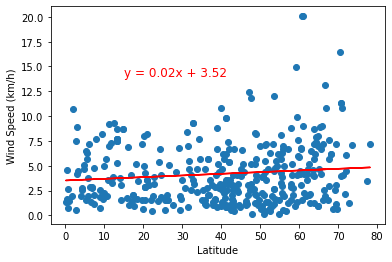

Plot of city latitude vs. wind speed (km/h). R-squared value of 0.012110078441175334 indicates there is little correlation between latitude and wind speed. Majority of wind speeds in the northern hemisphere are below 10 km/h.


In [24]:
# Linear Regression
# Lat vs. Wind Speed (NH)
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,14),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

print(f"Plot of city latitude vs. wind speed (km/h). R-squared value of {rvalue**2} indicates there is little correlation between latitude and wind speed. Majority of wind speeds in the northern hemisphere are below 10 km/h.")


The r-squared is: 0.0200897790322323


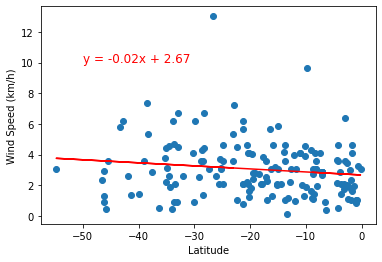

Plot of city latitude vs. wind speed (km/h). R-squared value of 0.0200897790322323 indicates there is little correlation between latitude and wind speed. Majority of wind speeds in the southern hemisphere are below 6 km/h.


In [25]:
# Linear Regression
# Lat vs. Wind Speed (SH)
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=12,color='red')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

print(f"Plot of city latitude vs. wind speed (km/h). R-squared value of {rvalue**2} indicates there is little correlation between latitude and wind speed. Majority of wind speeds in the southern hemisphere are below 6 km/h.")
